In [10]:
# IMPORTS
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tabulate import tabulate
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation,Conv2D, MaxPooling2D, Flatten
print('Modules Loaded...')

Modules Loaded...


In [11]:
# VERSION
print('Tensorflow Version :', tf.__version__)
print('GPU is','available' if tf.config.list_physical_devices('GPU') else'Not Available')

Tensorflow Version : 2.6.0
GPU is Not Available


In [12]:
# PATH
datasetPath = 'dataset'
trainingPath = os.path.join(datasetPath, 'train')
validationPath = os.path.join(datasetPath, 'val')
testingPath = os.path.join(datasetPath, 'test')
print('Path Loaded...')

Path Loaded...


In [13]:
# SPLITTING DATASET
# splitfolders.ratio(
#     datasetPath, 
#     output = outputPath,
#     seed = 1337, 
#     ratio = (.8, .1, .1), 
#     group_prefix = None, 
#     move = False
# )

In [14]:
# LIST
# imageList = [] 
# labelList = []

In [15]:
#TUNING PARAMATERS
channels = 3
imageSize = (256, 256)
imageShape = (imageSize[0], imageSize[1], channels)
batchSize = 32
learningRate = 0.001
epochs = 24
print('Tuning Parameters Loaded...')

Tuning Parameters Loaded...


In [16]:
# COUNTING NUMBER OF FILES IN DATASET
def countImages(dir):
    counter = 0
    for dirTuple in os.walk(dir):
        for _ in dirTuple[2]:
            counter += 1
    return(str(counter))

In [18]:
# TOTAL IMAGES IN DATASET
print('Total Images in the Dataset :', countImages(datasetPath))
print('Total Images in Training Dataset :', countImages(trainingPath))
print('Total Images in Validation Dataset :', countImages(validationPath))
print('Total Images in Testing Dataset :', countImages(testingPath))

Total Images in the Dataset : 20639
Total Images in Training Dataset : 16505
Total Images in Validation Dataset : 2076
Total Images in Testing Dataset : 2058


In [12]:
# CONVERTING IMAGES TO ARRAYS
# def convertImageToArray(dir):
#     try:
#         image = cv2.imread(dir)
#         if image is not None :
#             image = cv2.resize(image, imageSize)   
#             return img_to_array(image)
#         else :
#             return np.array([])
#     except Exception as e:
#         print(f'Error : {e}')
#         return None

In [13]:
# ADDING IMAGES AND LABEL TO LIST
# def addingImageToList(dir,imageList,labelList):
#     try:
#         pathList = os.listdir(dir)
#         for plantFolder in pathList:
#             plantImagePath = os.path.join(dir,plantFolder)
#             plantImageList = os.listdir(plantImagePath)
#             for image in plantImageList[:200]:
#                 imagePath = os.path.join(plantImagePath,image)
#                 if (imagePath.endswith('.jpg') == True) or (imagePath.endswith('.JPG') == True):
#                     imageList.append(convertImageToArray(imagePath))
#                     labelList.append(plantFolder)
#     except Exception as e:
#         print(f'Error : {e}')

In [19]:
# NUMBER OF IMAGES IN EACH CLASS
def countImagesByLabel(dir):
    folders = os.listdir(dir)
    folderDict = dict()
    for folder in folders:
        path = os.path.join(dir, folder)
        folderDict[folder] = len(os.listdir(path))
    imgDf = pd.DataFrame(
        folderDict.values(),
        index = folderDict.keys(),
        columns = ['Number Of Images']
    )
    imgDf.index.name = 'Classes'
    return imgDf

In [15]:
# TOTAL IMAGES BY LABEL
countImagesByLabel(trainingPath)

,Number Of Images
Classes,
Pepper__bell___Bacterial_spot,797
Pepper__bell___healthy,1182
Potato___Early_blight,800
Potato___healthy,121
Potato___Late_blight,800
Tomato_Bacterial_spot,1701
Tomato_Early_blight,800
Tomato_healthy,1272
Tomato_Late_blight,1527


In [16]:
# CONVERTING LIST TO NUMPY ARRAY
# def convertToNumpy(imageList):
#     npImageList = np.array(imageList, dtype=np.float16) / 225.0
#     return npImageList

In [17]:
# TO BINARIZE LABELS
# def binarizeLabels(labelList):
#     lb = LabelBinarizer()
#     imageLabel = lb.fit_transform(labelList)
#     return imageLabel

In [18]:
# TRAIN-TEST-VALIDATION SPLIT
# xTrain, xRem, yTrain, yRem = train_test_split(
#     npImageList,
#     binLabelList, 
#     train_size = 0.8
# )
# xValid, xTest, yValid, yTest = train_test_split(
#     xRem,
#     yRem, 
#     test_size = 0.5
# )

In [20]:
# TRAINING DATASET
trainingAugmenter = ImageDataGenerator(
    horizontal_flip = True,
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = .1,
    height_shift_range = .1, 
    zoom_range = .2,
    shear_range = .2,
)
trainingDataGenerator = trainingAugmenter.flow_from_directory(
    trainingPath,
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = imageSize,
    batch_size = batchSize,
    seed = 42,
) 

Found 16504 images belonging to 15 classes.


In [21]:
# VALIDATION DATASET
validationAugmenter = ImageDataGenerator(
    rescale=1./255,
)
validationDataGenerator = validationAugmenter.flow_from_directory(
    validationPath,
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = imageSize,
    batch_size = batchSize,
    seed = 42,
)

Found 2076 images belonging to 15 classes.


In [22]:
# TESTING DATASET
testingAugmenter = ImageDataGenerator(
    rescale=1./255,
)
testingDataGenerator = testingAugmenter.flow_from_directory(
    testingPath,
    class_mode = 'categorical',
    color_mode = 'rgb',
    target_size = imageSize,
    batch_size = batchSize,
    seed = 42,
    shuffle = False,
)

Found 2058 images belonging to 15 classes.


In [23]:
# NUMBER OF CLASSES
classDict = {j: i for i, j in trainingDataGenerator.class_indices.items()}
classCount = len(classDict)
labelList = list(trainingDataGenerator.class_indices.keys())
print('Number of classes :', classCount)
print('Classes :',labelList)

Number of classes : 15
Classes : ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [24]:
# CLASSES
for i,j in classDict.items():
    print(i, ':', j)

0 : Pepper__bell___Bacterial_spot
1 : Pepper__bell___healthy
2 : Potato___Early_blight
3 : Potato___Late_blight
4 : Potato___healthy
5 : Tomato_Bacterial_spot
6 : Tomato_Early_blight
7 : Tomato_Late_blight
8 : Tomato_Leaf_Mold
9 : Tomato_Septoria_leaf_spot
10 : Tomato_Spider_mites_Two_spotted_spider_mite
11 : Tomato__Target_Spot
12 : Tomato__Tomato_YellowLeaf__Curl_Virus
13 : Tomato__Tomato_mosaic_virus
14 : Tomato_healthy


In [25]:
# DISPLAYING IMAGES FROM DATASET
def showImages(title, generator):
    fig = plt.figure(figsize=(20, 20))  
    images, labels = next(generator) 
    for i in range(9):
        ax = fig.add_subplot(3, 3, i + 1)
        image = images[i]
        ax.imshow(image)
        index = np.argmax(labels[i])
        label = labelList[index]
        ax.set_title(
            label, 
            color = 'black', 
            fontsize = 15
        )
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    fig.text(
        s = title, 
        x = 0.125, 
        y = 0.9, 
        fontweight = 'bold', 
        fontfamily = 'serif', 
        fontsize = 25)

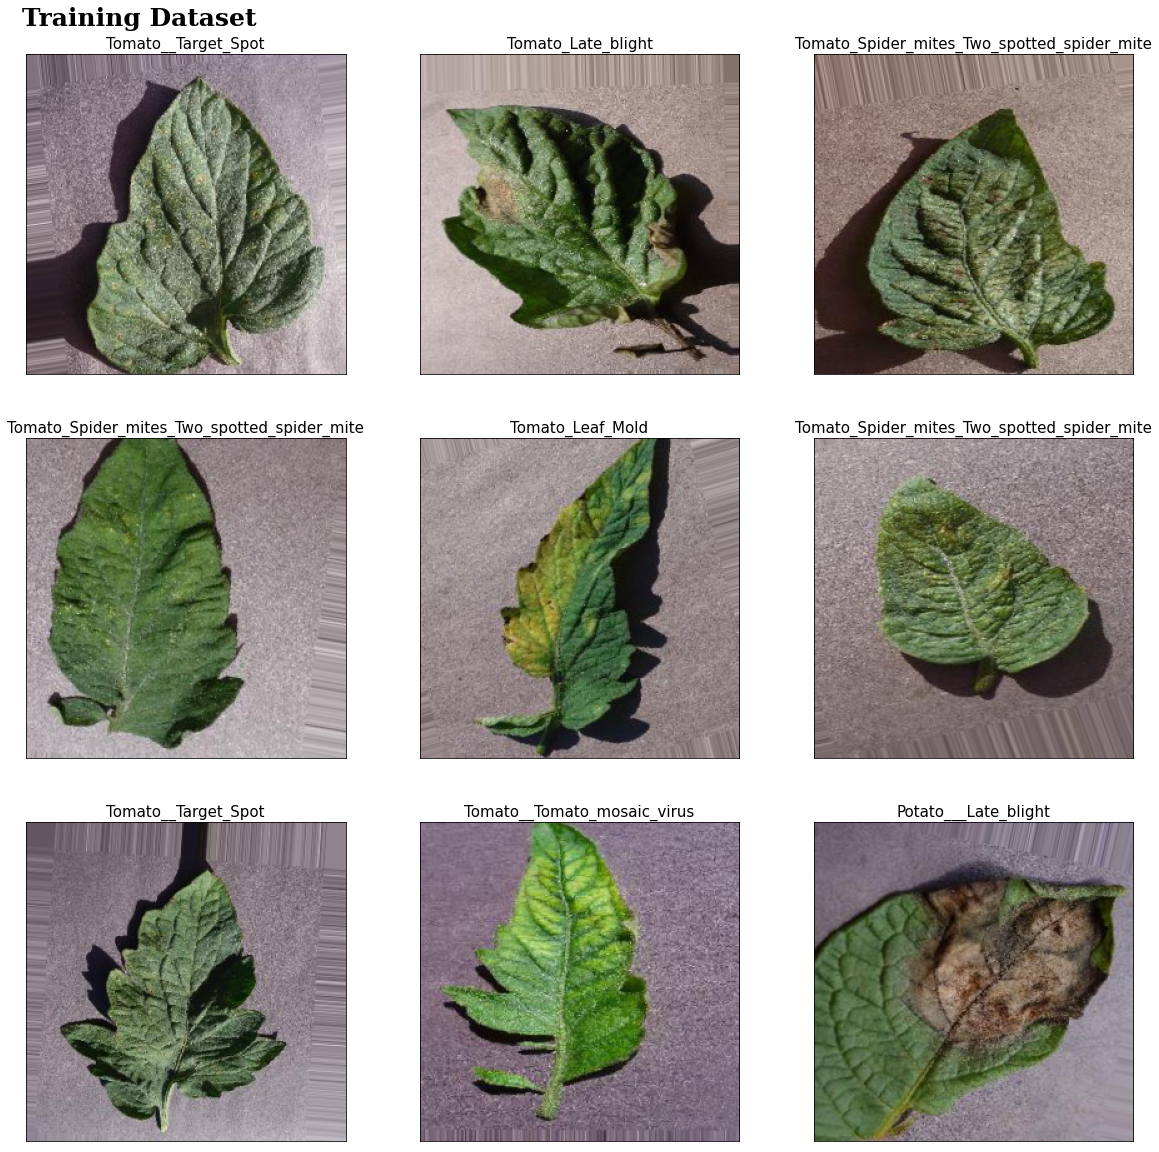

In [26]:
# SET OF IMAGES FROM DATASET
showImages('Training Dataset', trainingDataGenerator)

In [21]:
# MODEL
def buildModel(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    if K.image_data_format() == 'channels_first':
        inputShape = (depth, height, width)
        chanDim = 1
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (3, 3)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    
    model.add(Conv2D(128, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    
    return model

In [22]:
# BUILD MODEL
model = buildModel(
    width = imageShape[0], 
    height = imageShape[1], 
    depth = imageShape[2], 
    classes = classCount
)

In [23]:
# MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0

In [38]:
# EARLY STOPPING
# early_stopping = callbacks.EarlyStopping(
#     monitor = 'val_loss', 
#     mode = 'auto', 
#     min_delta = 0.001, 
#     patience = 20, 
#     restore_best_weights = True,
# )

In [24]:
# COMPILE MODEL
model.compile(
   optimizer = Adam(learning_rate = learningRate), 
   loss = 'categorical_crossentropy',
   metrics = ['accuracy']
)

In [15]:
# TRAINING MODEL
history = model.fit(
        trainingDataGenerator,
        steps_per_epoch = trainingDataGenerator.samples//trainingDataGenerator.batch_size,
        epochs = epochs,
        validation_data = validationDataGenerator,
        validation_steps = validationDataGenerator.samples//validationDataGenerator.batch_size,
        verbose = 1,
)

2022-02-12 10:51:44.641205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/24


2022-02-12 10:51:47.055127: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


515/515 [==============================] - 284s 536ms/step - loss: 1.2537 - accuracy: 0.6342 - val_loss: 6.3905 - val_accuracy: 0.1982
Epoch 2/24
515/515 [==============================] - 242s 469ms/step - loss: 0.7023 - accuracy: 0.7733 - val_loss: 1.7394 - val_accuracy: 0.6675
Epoch 3/24
515/515 [==============================] - 242s 471ms/step - loss: 0.5683 - accuracy: 0.8143 - val_loss: 1.0707 - val_accuracy: 0.7769
Epoch 4/24
515/515 [==============================] - 244s 474ms/step - loss: 0.4439 - accuracy: 0.8538 - val_loss: 1.5101 - val_accuracy: 0.7368
Epoch 5/24
515/515 [==============================] - 248s 481ms/step - loss: 0.3841 - accuracy: 0.8725 - val_loss: 11.8917 - val_accuracy: 0.3374
Epoch 6/24
515/515 [==============================] - 249s 483ms/step - loss: 0.3400 - accuracy: 0.8843 - val_loss: 1.6813 - val_accuracy: 0.6768
Epoch 7/24
515/515 [==============================] - 246s 478ms/step - loss: 0.2857 - accuracy: 0.9070 - val_loss: 0.8034 - val_accur

In [23]:
# SAVING HISTORY
# np.save('trainingData.npy', history.history)

In [28]:
# LOADING HISTORY
history = np.load('trainingData.npy', allow_pickle = 'TRUE').item()

In [29]:
# SAVING MODEL
# model.save('plantDiseaseDetection.h5')

In [30]:
# LOADING MODEL
model = load_model('plantDiseaseDetection.h5')

In [27]:
# TESTING MODEL
accuracy = model.evaluate( 
    testingDataGenerator, 
    verbose = 1, 
    return_dict = False)
print(f'Test Accuracy: {accuracy[1]*100}')

65/65 [==============================] - 27s 413ms/step - loss: 0.2572 - accuracy: 0.9378
Test Accuracy: 93.78036856651306


In [28]:
# PLOTTING TRAINING AND VALIDATION ACCURACY
def plotData(trainingData):
    trainingAccuracy = trainingData['accuracy']
    trainingLoss = trainingData['loss']
    validationAccuracy = trainingData['val_accuracy']
    validationLoss = trainingData['val_loss']
    epochCount = len(trainingAccuracy)
    epochList = list(range(1,epochCount+1))   
    indexLoss = np.argmin(validationLoss)
    validationLowest = validationLoss[indexLoss]
    indexAccuracy = np.argmax(validationAccuracy)
    accuracyHighest = validationAccuracy[indexAccuracy]
    plt.style.use('fivethirtyeight')
    vLossLabel = 'Best Epoch = '+ str(indexLoss + 1)
    vAccuracyLabel = 'Best Epoch = '+ str(indexAccuracy + 1)
    fig, axes = plt.subplots(
        nrows = 1, 
        ncols = 2, 
        figsize=(20,10)
    )
    axes[0].plot(
        epochList,
        trainingLoss, 
        'r', 
        label = 'Training Loss'
    )
    axes[0].plot(
        epochList,
        validationLoss,
        'g',
        label = 'Validation Loss' 
    )
    axes[0].scatter(
        indexLoss + 1,
        validationLowest, 
        s = 150, 
        c = 'blue', 
        label = vLossLabel
    )
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (
        epochList,
        trainingAccuracy,
        'r',
        label = 'Training Accuracy')
    axes[1].plot (
        epochList,
        validationAccuracy,
        'g',
        label = 'Validation Accuracy')
    axes[1].scatter(
        indexAccuracy + 1,
        accuracyHighest, 
        s = 150, 
        c = 'blue', 
        label = vAccuracyLabel
    )
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

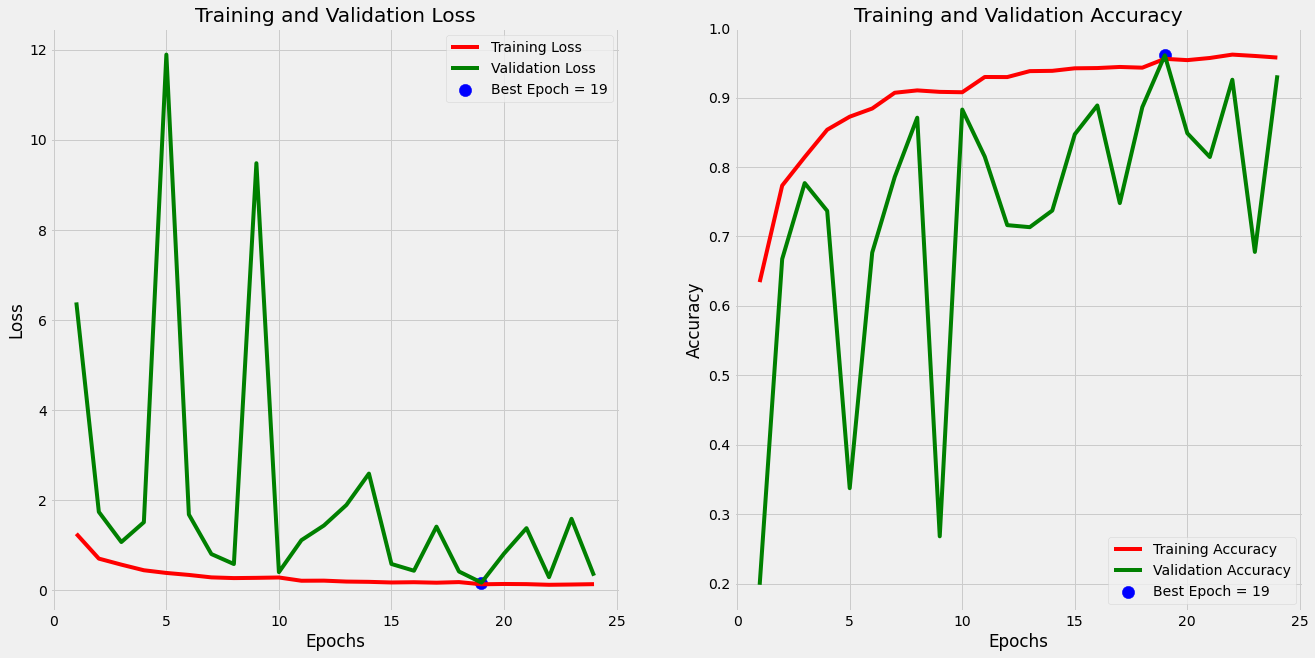

In [28]:
# PLOT
plotData(history)

In [31]:
# MAKE DETECTION USING IMAGE
def imageDetection(path):
    image = cv2.imread(path)
    image = cv2.resize(image,imageSize)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inputImage = image*(1./255)
    inputImage = tf.expand_dims(inputImage, axis = 0)
    predictions = model.predict(inputImage)
    predictedIndex = np.argmax(predictions[0])
    label = labelList[predictedIndex]
    accuracy = str(round(predictions[0][predictedIndex]*100,3))
    title = f'{label} | Accuracy: {accuracy}'
    plt.figure(figsize = [10, 10])
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

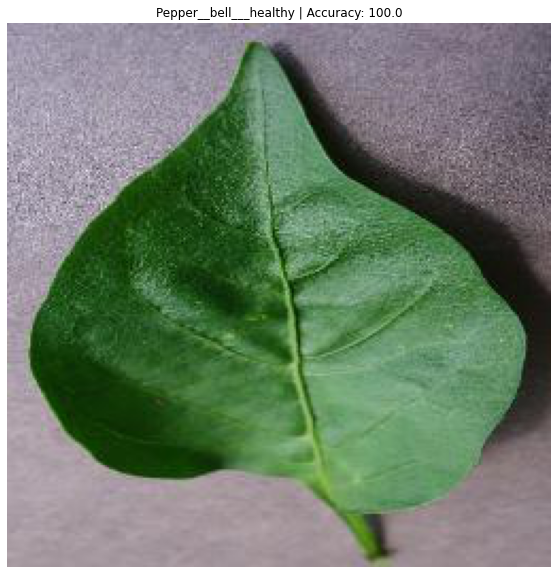

In [33]:
# TESTING USING IMAGE
imgPath = 'dataset/test/Pepper__bell___healthy/0137d804-551d-4f78-88b4-d603056dd7e7___JR_HL 7719.JPG'
imageDetection(imgPath)

In [34]:
# PREDICTING RANDOMLY FROM DATASET
def randomPredicter(generator, counter):
    for idx, filePath in enumerate(random.sample(generator.filepaths, counter)):
        print(f'ID: {idx+1}')
        print(f'Path: {filePath}')
        label = filePath.split('\\')[2]
        print(f'Class: {label}')
        imageDetection(filePath)

ID: 1
Path: dataset\test\Tomato__Tomato_mosaic_virus\146eaf68-7f61-4717-ac81-2f8bb4533fec___PSU_CG 2406.JPG
Class: Tomato__Tomato_mosaic_virus


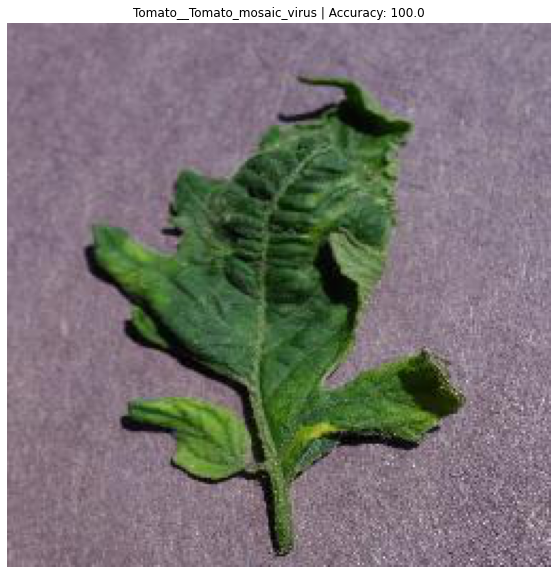

ID: 2
Path: dataset\test\Tomato__Tomato_YellowLeaf__Curl_Virus\87f81b35-9059-478b-a775-33f232b8228f___YLCV_GCREC 2177.JPG
Class: Tomato__Tomato_YellowLeaf__Curl_Virus


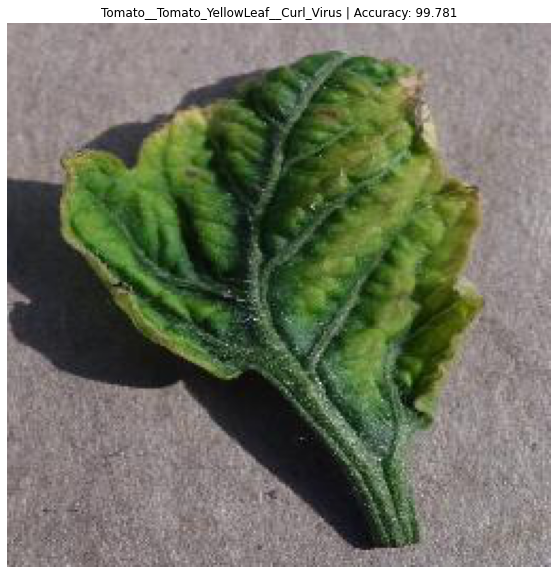

In [35]:
# TESTING RANDOMLY
randomPredicter(testingDataGenerator,2)

In [31]:
# PREDICTIONS
predictions = model.predict(
    testingDataGenerator, 
    verbose = 1,
)

65/65 [==============================] - 24s 367ms/step


In [32]:
# PREDICTED LABELS
predictedLabels = np.argmax(
    predictions, 
    axis = -1
)

In [32]:
# DISPLAYING CLASSIFICATION REPORT
def printClassificationReport(generator):
    report = classification_report(
        generator.labels, 
        predictedLabels, 
        target_names = labelList
    )
    print('Classification Report:')
    print('-'*100)
    print(report)

In [39]:
# CLASSIFICATION REPORT
printClassificationReport(testingDataGenerator)

Classification Report:
----------------------------------------------------------------------------------------------------
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       1.00      0.88      0.94        99
                     Pepper__bell___healthy       0.95      1.00      0.97       147
                      Potato___Early_blight       0.86      1.00      0.93       100
                       Potato___Late_blight       0.99      0.78      0.87       100
                           Potato___healthy       0.94      1.00      0.97        15
                      Tomato_Bacterial_spot       0.98      0.97      0.97       212
                        Tomato_Early_blight       0.95      0.95      0.95       100
                         Tomato_Late_blight       0.96      0.96      0.96       190
                           Tomato_Leaf_Mold       0.99      0.97      0.98        95
                  Tomato_

In [50]:
# PlOT CONFUSION MATRIX
def plotConfusionMatrix(generator, predictions):
    confusionMatrix = confusion_matrix(generator.classes, predictions)
    plt.figure(figsize = (18, 18))
    sns.heatmap(
        confusionMatrix, 
        annot = True, 
        vmin = 0, 
        fmt = 'g', 
        cmap = 'Greens', 
        cbar = True,
        linecolor = 'black', 
        linewidth = 2, 
    )       
    plt.xticks(np.arange(classCount) + .5, classDict.keys(), rotation = 0)
    plt.yticks(np.arange(classCount) + .5, classDict.keys(), rotation = 0)
    plt.style.use('fivethirtyeight')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()    

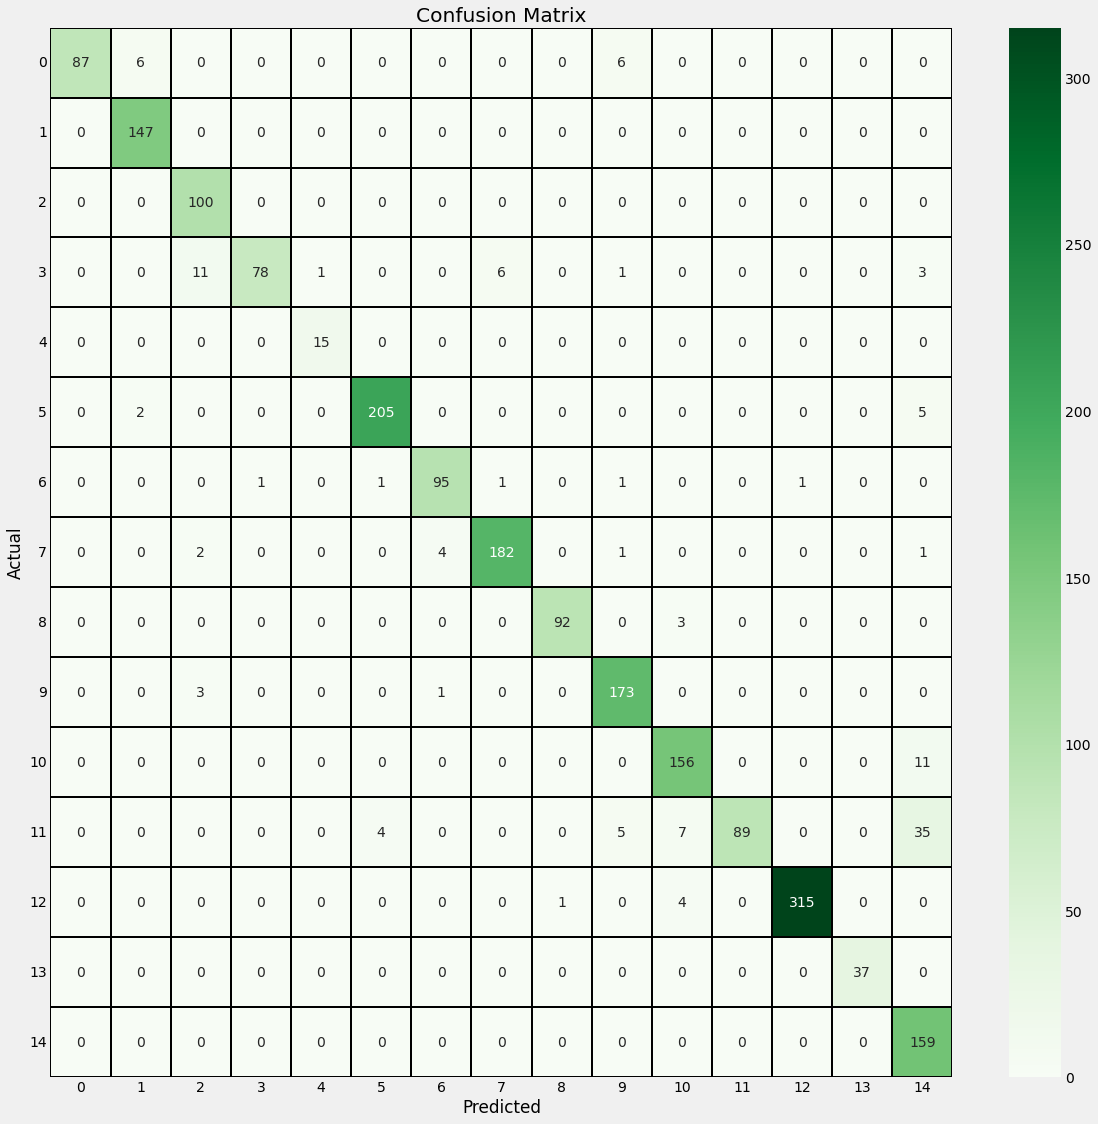

In [51]:
# CONFUSION MATRIX
plotConfusionMatrix(testingDataGenerator, predictedLabels)

In [33]:
# DISPLAYING ERRORS
def printErrors(generator, predictions, printDf = False):
    labels = generator.labels
    fileNames = generator.filenames 
    errorList = list()
    trueClass = list()
    predictedClass = list()
    probabilityList = list()
    errors = 0      
    for i, p in enumerate(predictions):
        predictiveIndex = np.argmax(p)         
        trueIndex = labels[i]  
        if predictiveIndex != trueIndex: 
            errorList.append(fileNames[i])
            trueClass.append(labelList[trueIndex])
            predictedClass.append(labelList[predictiveIndex])
            probabilityList.append(p[predictiveIndex])           
            errors += 1 
    print('Total Images in Dataset :',len(labels))
    print('Correct Predictions :',len(labels) - errors)
    print('Wrong Predictions :',errors)
    if printDf:
        errorDict = {
            'Filename' : errorList, 
            'Predicted Class' : predictedClass, 
            'True Class' : trueClass, 
            'Probability' : probabilityList
        }
        errorDf = pd.DataFrame(errorDict)
        print(print(tabulate(errorDf, headers = 'keys', tablefmt = 'psql')))

In [34]:
# RESULTS
printErrors(testingDataGenerator, predictions, printDf=True)

Total Images in Dataset : 2058
Correct Predictions : 1930
Wrong Predictions : 128
+-----+----------------------------------------------------------------------------------------------------------+---------------------------------------------+---------------------------------------------+---------------+
|     | Filename                                                                                                 | Predicted Class                             | True Class                                  |   Probability |
|-----+----------------------------------------------------------------------------------------------------------+---------------------------------------------+---------------------------------------------+---------------|
|   0 | Pepper__bell___Bacterial_spot\0e57b44f-bb06-43ec-8688-5a7985b461e7___JR_B.Spot 8970.JPG                  | Pepper__bell___healthy                      | Pepper__bell___Bacterial_spot               |      0.950577 |
|   1 | Pepper__bell___Bac

In [35]:
def plotErrors(generator, predictions):
    labels = generator.labels
    errorIndex = list()
    for i, p in enumerate(predictions):
        predictiveIndex = np.argmax(p)         
        trueIndex = labels[i]  
        if predictiveIndex != trueIndex: 
            errorIndex.append(trueIndex)              
    plotBar = list()
    plotClass = list()
    for key, value in classDict.items():        
        count = errorIndex.count(key) 
        if count != 0:
            plotBar.append(count) 
            plotClass.append(value)  
    fig = plt.figure(figsize=(10, 4)) 
    plt.style.use('fivethirtyeight')
    for i in range(len(plotClass)):
        c = plotClass[i]
        x = plotBar[i]
        plt.barh(
            c, 
            x,
            linewidth = 1,
        )
        plt.text(
            x + .5, 
            i - .2, 
            str(x),
        )
        plt.title('Errors by Class in Testing Dataset')
    plt.show()

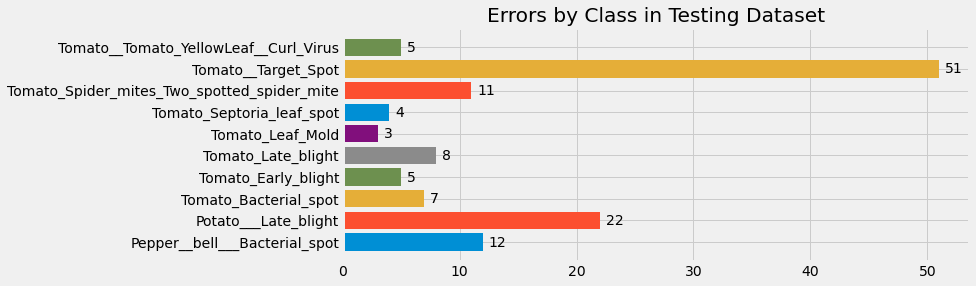

In [138]:
plotErrors(testingDataGenerator, predictions)